# Optimización por grafo

La optimización por grafo se ha realizado tanto para BO como para COBYLA. El usuario puede seleccionar los resutlados que desee.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from src.aitor_utils import Graph_gen, get_blockade_configurations2, C_from_gr, gaussian, plot_sp_ar

import networkx as nx

**Cargo el DataFrame de la optimización por grafo**

In [12]:
df_opt = pd.read_csv('opt_por_seed.csv')
# df_opt = pd.read_csv('cobyla_7_por_seed.csv')
# df_opt.columns = ['seed', 'ar', 'succ']
# df_opt.columns = ['seed', 'ar', 'succ', 'omega', 'deltag', 'deltal']
df_opt.head()

,seed,AR_max,reached_0.95,reached_0.98,reached_0.99,reached_0.999,hist_AR
0,628,0.975928,5,NaN,NaN,NaN,"[np.float64(0.8476024522292993), np.float64(0...."
1,629,0.999910,5,5.0,5.0,5.0,"[np.float64(0.8733235022650057), np.float64(0...."
2,630,0.999872,5,5.0,5.0,5.0,"[np.float64(0.9208468236714975), np.float64(0...."
3,631,0.999183,5,5.0,5.0,268.0,"[np.float64(0.8699287773666359), np.float64(0...."
4,632,0.999794,1,1.0,1.0,5.0,"[np.float64(0.9961055080721747), np.float64(0...."


**Cargo el DataFrame de las semillas y sus características**

In [ ]:
df_hp = pd.read_csv('../data/res_1000_clasificado.csv')
df_hp = df_hp.drop(columns=['n_nodos','atoms_w','atoms_l','p_0','p_1','succ','ar'])
df_hp.head()

,seed,e_gap,e_0,e_1,curva,b,hp,hp_inv
0,0,0.071,-1.9603,-1.8893,linear,0.001000,1.0,1.0
1,0,0.071,-1.9603,-1.8893,linear,0.002250,1.0,1.0
2,0,0.071,-1.9603,-1.8893,linear,0.004257,1.0,1.0
3,0,0.071,-1.9603,-1.8893,linear,0.007201,1.0,1.0
4,0,0.071,-1.9603,-1.8893,linear,0.011260,1.0,1.0


**Unimos DataFrames**

In [14]:
df_merge = df_opt.merge(df_hp, on='seed', how='inner')

**Escoger parámetros del HP**

In [15]:
def escoger_hp(b, curva):
    """Función para escoger los hyperparámetros de la simulación."""
    global df_opt, df_hp

    # Filtramos por curva y b
    b_value = df_hp['b'].unique()[b]
    curve_value = curva
    print('b:',b_value,'; curva:',curve_value)
    df_hp_f = df_hp[(df_hp['b'] == b_value) & (df_hp['curva'] == curve_value)]
    df_hp_f = df_hp_f.drop(columns=['b','curva'])

    # Unimos los dataframes por la columna 'seed'
    df_merge = df_opt.merge(df_hp_f, on='seed', how='inner')
    
    return df_merge

In [16]:
df = escoger_hp(13, 'linear')

b: 0.1276040838082742 ; curva: linear


# Estudiar los NaN

NaN implica que no se ha llegado a superar el umbral

#### AR > 0.95

In [9]:
print(f"De 1000 grafos {df['reached_0.95'].isna().sum()} no han alcanzado un AR de 95%")

De 1000 grafos 0 no han alcanzado un AR de 95%


#### AR > 0.98

In [11]:
print(f"De 1000 grafos {df['reached_0.98'].isna().sum()} no han alcanzado un AR de 98%")

De 1000 grafos 28 no han alcanzado un AR de 98%


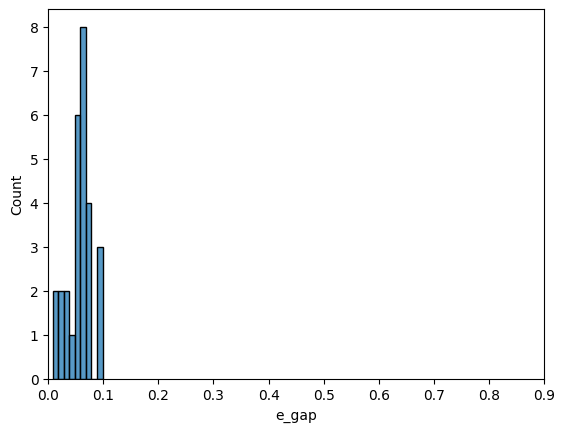

In [12]:
df_na = df[df['reached_0.98'].isna()]
sns.histplot(data=df_na, x='e_gap', binwidth=0.01)
plt.xlim(0, 0.9)
plt.show()

#### AR > 0.99

In [13]:
print(f"De 1000 grafos {df['reached_0.99'].isna().sum()} no han alcanzado un AR de 99%")

De 1000 grafos 70 no han alcanzado un AR de 99%


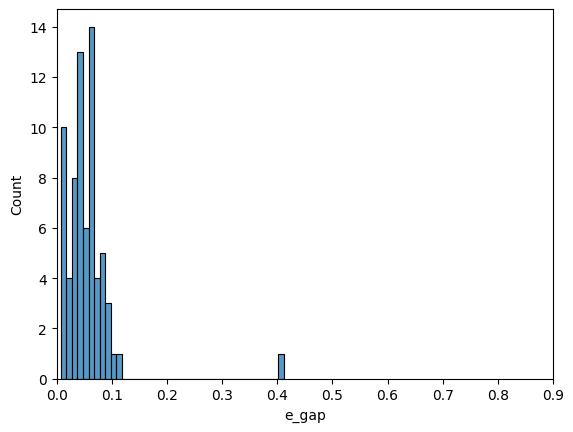

In [14]:
df_na = df[df['reached_0.99'].isna()]
sns.histplot(data=df_na, x='e_gap', binwidth=0.01)
plt.xlim(0, 0.9)
plt.show()

#### AR > 0.999

In [15]:
print(f"De 1000 grafos {df['reached_0.999'].isna().sum()} no han alcanzado un AR de 99.9%")

De 1000 grafos 180 no han alcanzado un AR de 99.9%


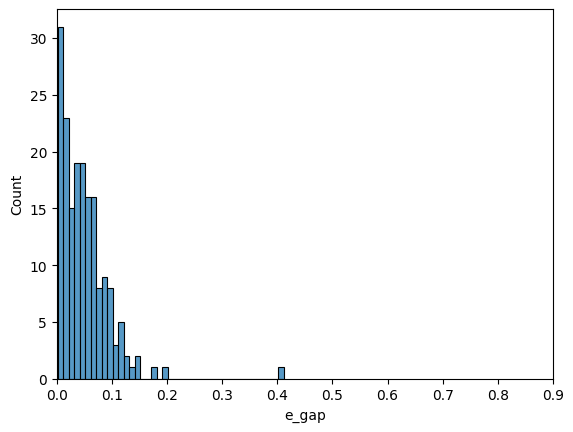

In [16]:
df_na = df[df['reached_0.999'].isna()]
sns.histplot(data=df_na, x='e_gap', binwidth=0.01)
plt.xlim(0, 0.9)
plt.show()

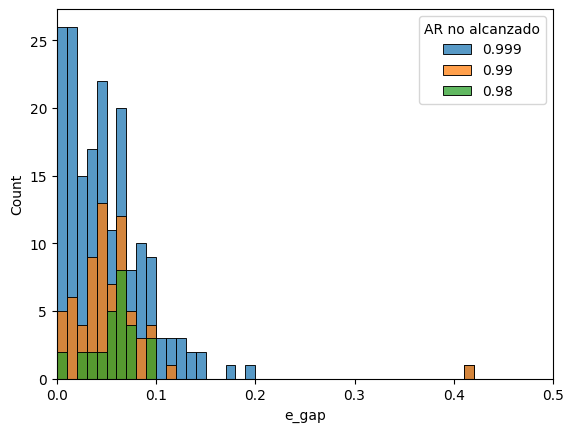

In [17]:
bins = np.linspace(0, 0.5, 51)

df_na = df[df['reached_0.999'].isna()]
sns.histplot(data=df_na, x='e_gap', bins=bins, label='0.999')

df_na = df[df['reached_0.99'].isna()]
sns.histplot(data=df_na, x='e_gap', bins=bins, label='0.99')

df_na = df[df['reached_0.98'].isna()]
sns.histplot(data=df_na, x='e_gap', bins=bins, label='0.98')

plt.xlim(0, 0.5)
plt.legend(title='AR no alcanzado')
plt.show()

# Mejores óptimos de cada grafo

C:\Users\aitoo\AppData\Local\Temp\ipykernel_2740\322363095.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(df, x='e_gap', y='AR_max', palette='viridis', alpha=1)


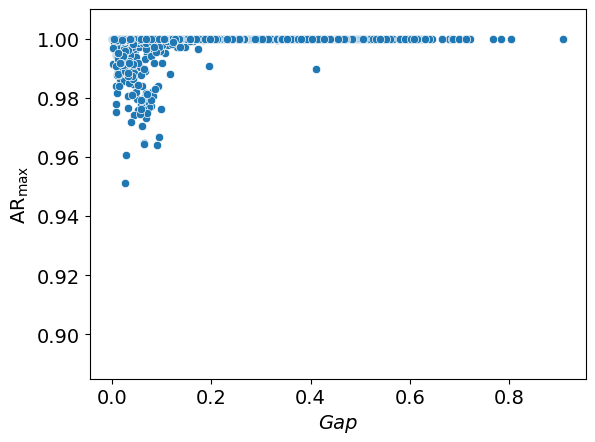

In [20]:
sns.scatterplot(df, x='e_gap', y='AR_max', palette='viridis', alpha=1)
plt.ylim(0.885,1.01)
plt.ylabel(r'$\mathrm{AR}_{\mathrm{max}}$', fontsize=14)
plt.xlabel('Gap', fontsize=14, style='italic')
plt.tick_params(axis='both', labelsize=14)
plt.show()

## Estudiar grafos a nivel individual

In [24]:
import plotly.express as px
# Crear el gráfico interactivo
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import SelectionSlider


# Lista de valores únicos de b y curva en clasif
b_values = df_merge['b'].unique()
curva_values = df_merge['curva'].unique()
# df_merge['ratio'] = df_merge['e_1'] / df_merge['e_0']

# Función para actualizar el gráfico
def update_plot(umbral):
    
    # Filtrar el dataframe según el valor de b y la curva seleccionada
    simul2 = df_merge[(df_merge['e_gap'] < 0.2) & (df_merge['b'] == umbral) & (df_merge['curva'] == 'linear')]

    fig = px.scatter(simul2, 
                 x='e_gap', 
                 y='AR_max', 
                 color='hp_inv',
                 hover_data={'e_gap': False, 'seed': True, 'hp_inv': True, 'AR_max': False})

    # sns.scatterplot(data=simul2, x='e_gap', y='succ', hue='hp_inv', size=2, alpha=0.8, palette='viridis_r', ax=axes[0])
    # px.xlim([-0.005, 0.1])
    fig.update_yaxes(range=[0.86, 1.005], row=1, col=1)
    fig.update_xaxes(range=[-0.005, 0.2], row=1, col=1)
    # px.set_xlim([-0.005, 0.1])
    # px.ylim([-0.05, 1.05])
    
    
    # plt.title(f"Curva: {curva} | b = {b_values[b_index]:.3f}")
    fig.show()

# Crear widgets interactivos
# curva_dropdown = widgets.Dropdown(options=curva_values, value='cubic', description='Curva')
# umbral_slider = widgets.FloatSlider(min=0.3, max=1, step=0.05, value=1.0, description='HP Inversa')
# b_slider = widgets.IntSlider(min=0, max=len(b_values) - 1, step=1, value=10, description='Índice b')
# Definir el slider con valores discretos
umbral_slider = SelectionSlider(
    options=b_values,
    value=b_values[0],
    description='b',
    continuous_update=False
)

# Interfaz interactiva
interact(update_plot, umbral=umbral_slider);

interactive(children=(SelectionSlider(continuous_update=False, description='b', options=(np.float64(0.001), np…

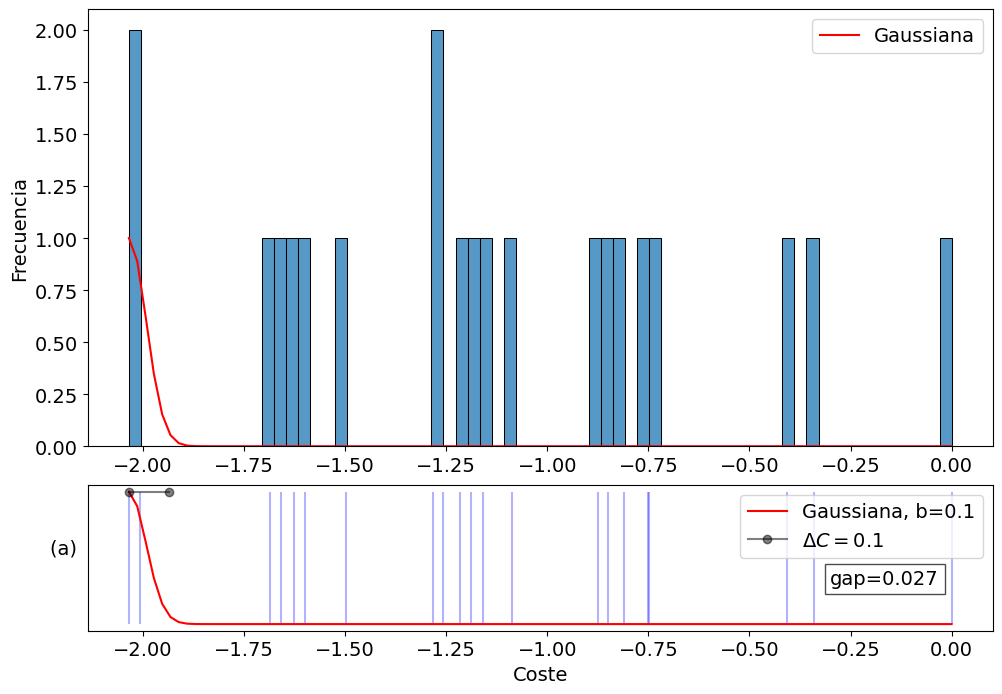

In [ ]:
def mostrar_espectro(seed, b_value, curva='linear'):
    scale = 5*1e-6
    np.random.seed(seed)
    G, register = Graph_gen(7, 4, 3, scale)
    pos = np.array(list(nx.get_node_attributes(G, 'pos').values()))
    og_weights = np.array(list(nx.get_node_attributes(G, 'weight').values()))
    new_edges = G.edges()
    conf = get_blockade_configurations2(pos, 7.2e-6)
    # Calculo el espectro de energia
    df = pd.DataFrame(conf, columns=['bitstring'])
    df['energia'] = df['bitstring'].apply(lambda x: C_from_gr(x, og_weights, new_edges))
    df = df.sort_values('energia', ascending=True)

    # Calcular e_gap
    e_gap = df['energia'].values[1] - df['energia'].values[0]
    e_min = df['energia'].values[0]

    # Calcular hp
    df['ponderacion'] = (df['energia'].apply(lambda x: gaussian(E=x, a=e_min, b=b_value, met=curva)))
    hp_val = sum(df['ponderacion'].values)

    # Crear figura con subplots
    fig, axs = plt.subplots(2, 1, figsize=(10, 7), gridspec_kw={'height_ratios': [3, 1]})

    # Subplot 1: Distribución de energías
    sns.histplot(df['energia'], binwidth=0.03, ax=axs[0])
    axs[0].set_ylabel('Frecuencia', fontsize=14)

    # Eliminar nombre eje
    axs[0].set_xlabel('')

    xx = np.linspace(e_min, 0, 100)
    axs[0].plot(xx, gaussian(xx, e_min, b_value, met=curva), 'r-', label='Gaussiana')
    axs[0].legend(fontsize=14)

    # Subplot 2: Espectro de energía
    for i in range(len(df['energia'])):
        axs[1].vlines(df['energia'].values[i], 0, 1, color='blue', alpha=0.3)
    axs[1].plot(xx, gaussian(xx, e_min, b_value, met=curva), 'r-', label=f'Gaussiana, b={b_value}')
    axs[1].set_xlabel('Coste', fontsize=14)
    axs[1].set_ylabel('(a)      ', fontsize=14, rotation=0)
    axs[1].set_yticks([])  # Opcional, para quitar las marcas del eje y
    
    axs[1].plot([e_min, e_min + 0.1], [1, 1], 'k-o', alpha=0.5, label=f'$\Delta C=0.1$')
    axs[1].legend(fontsize=14)
    # Añadir texto con fondo blanco y sin borde

    axs[1].text(-0.3, 0.3, f'gap={e_gap:.3f}', fontsize=14, bbox=dict(facecolor='white', alpha=0.7))


    # Ajustar los espacios entre subplots
    plt.tight_layout()

    # Aumentar el tamaño de los tick
    for ax in axs:
        ax.tick_params(axis='both', which='major', labelsize=14)
        ax.tick_params(axis='both', which='minor', labelsize=14)

    # Mostrar la figura
    plt.show()
mostrar_espectro(34, 0.1, 'linear')

# Estudiar para una curva y b concreto

b: 0.1054308499733486 ; curva: linear
1000


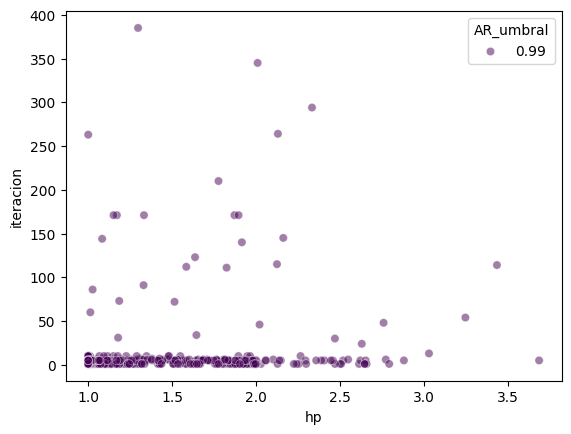

In [ ]:
df = escoger_hp(12, 'linear')
print(len(df))
# Columnas que quieres transformar (puedes ajustarlas si cambian)
cols_a_transformar = ["reached_0.95", "reached_0.98", "reached_0.99", "reached_0.999"]

# Hacemos melt manteniendo todas las demás columnas
df_largo = df.melt(
    id_vars=[col for col in df.columns if col not in cols_a_transformar],
    value_vars=cols_a_transformar,
    var_name="AR_umbral",
    value_name="iteracion"
)

# Limpiar el nombre de la columna AR_umbral si quieres quitar el prefijo 'reached_'
df_largo["AR_umbral"] = df_largo["AR_umbral"].str.replace("reached_", "")
df_largo["AR_umbral"] = df_largo["AR_umbral"].astype(float)
df_filtrado = df_largo[df_largo['AR_umbral'] == 0.999]


sns.scatterplot(df_filtrado, x='hp', y='iteracion', hue='AR_umbral', palette='viridis', alpha=0.5)
# plt.ylim(0, 30)
plt.show()